In [33]:
!pip install scikit-learn

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Classification, Handling Imbalanced Data
For this lab we will build a model on customer churn binary classification problem. You will be using `Data/DATA_Customer-Churn.csv` file.

### Scenario

You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Round 1
- ~~Import the required libraries and modules that you would need.~~
- ~~Read that data into Python and call the dataframe `churnData`.~~
- ~~Check the datatypes of all the columns in the data. You will see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.~~
- ~~Check for null values in the dataframe. Replace the null values.~~
- ~~Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:~~
  - ~~Split the data into a training set and a test set.~~
  - ~~Scale the features either by using normalizer or a standard scaler.~~
  - (optional)Fit a logistic Regression model on the training data.
  - ~~Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.~~
 
 Round 2
  - Fit a Decision Tree Classifier on the training data.
  - Check the accuracy on the test data.

 Round 3
 -  apply K-fold cross validation on your models before and check the model score.
**Note**: So far we have not balanced the data.

 Round 4
 - fit a Random forest Classifier on the data and compare the accuracy. 
 - tune the hyper paramters with gridsearch and check the results.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.



In [32]:
#Import the required libraries and modules that you would need.
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [7]:
file = 'DATA_Customer-Churn.csv'
churnData = pd.read_csv(file) 
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [14]:
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [64]:
#`TotalCharges` is object type. 
#Converting into numeric type using `pd.to_numeric` function.
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"],errors='coerce',downcast='float')

In [65]:
#Check for null values in the dataframe. Replace the null values.
nan_count = pd.isna(churnData)
nan_count.value_counts() #no null values?
churnData.dropna(inplace=True)

In [66]:
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object


In [67]:
#Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges' ,'TotalCharges']]
print(X.dtypes)
y = churnData['Churn']
y = y.apply( lambda x : 1 if x=='Yes' else 0)

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float32
dtype: object


In [68]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [110]:
def knn_test(X_train, y_train,X_test,nn):
    model = KNeighborsClassifier(n_neighbors=nn,weights='uniform') 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    y_pred_train=model.predict(X_train) 

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
    return performance_log


metrics_df = pd.DataFrame(columns=['NN','Error_metric','Train','Test'])
for nn in range(1,5):
    performance_log = knn_test(X_train, y_train,X_test,nn)
    

    metrics_df = pd.concat([metrics_df,performance_log])
    metrics_df['NN'] = nn

display(metrics_df)

KeyError: 1

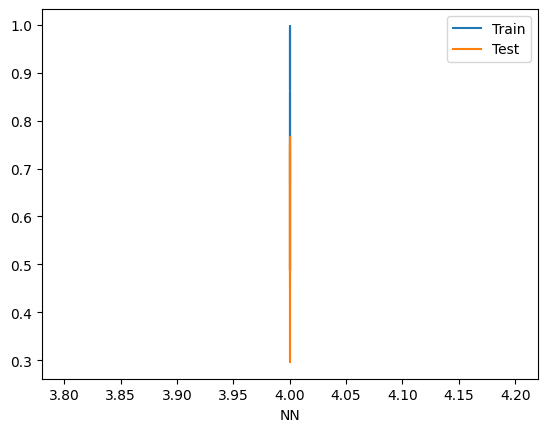

In [107]:
line = metrics_df.plot(x='NN')


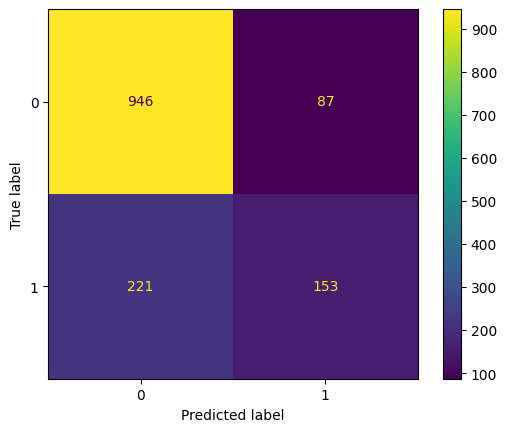

In [73]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()